In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')


def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse

# Only Volatility

In [105]:
BZBZ_onlyvol = pd.read_csv('Files/BZBZ_onlyvol_re.csv', index_col=0)
SPBZ_onlyvol = pd.read_csv('Files/SPBZ_onlyvol_re.csv', index_col=0)

BZBZ_onlyvol.index = pd.to_datetime(BZBZ_onlyvol.index)
SPBZ_onlyvol.index = pd.to_datetime(SPBZ_onlyvol.index)

pred_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Predictions'])
truth_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Ground Truths'])
pred_inv2 = pd.DataFrame(SPBZ_onlyvol['Predictions'])
truth_inv2 = pd.DataFrame(SPBZ_onlyvol['Ground Truths'])

loaded_scaler_onlyvol = load('Database/Scaler/scaler_0_onlyvol.joblib')

pred1 = loaded_scaler_onlyvol.inverse_transform(pred_BZBZ_onlyvol)
truth1 = loaded_scaler_onlyvol.inverse_transform(truth_BZBZ_onlyvol)

pred_inv = pd.DataFrame(pred1, columns=pred_BZBZ_onlyvol.columns, index=pred_BZBZ_onlyvol.index)
truth_inv = pd.DataFrame(truth1, columns=truth_BZBZ_onlyvol.columns, index=truth_BZBZ_onlyvol.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


# Exterior

In [106]:
# BZBZ_SP500 = pd.read_csv('Files/BZBZ_SP500.csv', index_col=0)
# SPBZ_SP500 = pd.read_csv('Files/SPBZ_SP500.csv', index_col=0)
BZBZ_SP500 = pd.read_csv('Files/BZBZ_SP500_re.csv', index_col=0)
SPBZ_SP500 = pd.read_csv('Files/SPBZ_SP500_re.csv', index_col=0)
SP500 = pd.read_csv('Database/BZ_vol_SP500.csv', index_col=0)

BZBZ_SP500.index = pd.to_datetime(BZBZ_SP500.index)
SPBZ_SP500.index = pd.to_datetime(SPBZ_SP500.index)
SP500.index = pd.to_datetime(SP500.index)

pred_BZBZ_SP500 = pd.concat([BZBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_BZBZ_SP500 = pd.concat([BZBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()
pred_SPBZ_SP500 = pd.concat([SPBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_SPBZ_SP500 = pd.concat([SPBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()

loaded_scaler_SP500 = load('Database/Scaler/scaler_0_SP500.joblib')

pred3 = loaded_scaler_SP500.inverse_transform(pred_BZBZ_SP500)
truth3 = loaded_scaler_SP500.inverse_transform(truth_BZBZ_SP500)
pred4 = loaded_scaler_SP500.inverse_transform(pred_SPBZ_SP500)
truth4 = loaded_scaler_SP500.inverse_transform(truth_SPBZ_SP500)

pred_inv3 = pd.DataFrame(pred3, columns=pred_BZBZ_SP500.columns, index=pred_BZBZ_SP500.index)
truth_inv3 = pd.DataFrame(truth3, columns=truth_BZBZ_SP500.columns, index=truth_BZBZ_SP500.index)
pred_inv4 = pd.DataFrame(pred4, columns=pred_SPBZ_SP500.columns, index=pred_SPBZ_SP500.index)
truth_inv4 = pd.DataFrame(truth4, columns=truth_SPBZ_SP500.columns, index=truth_SPBZ_SP500.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


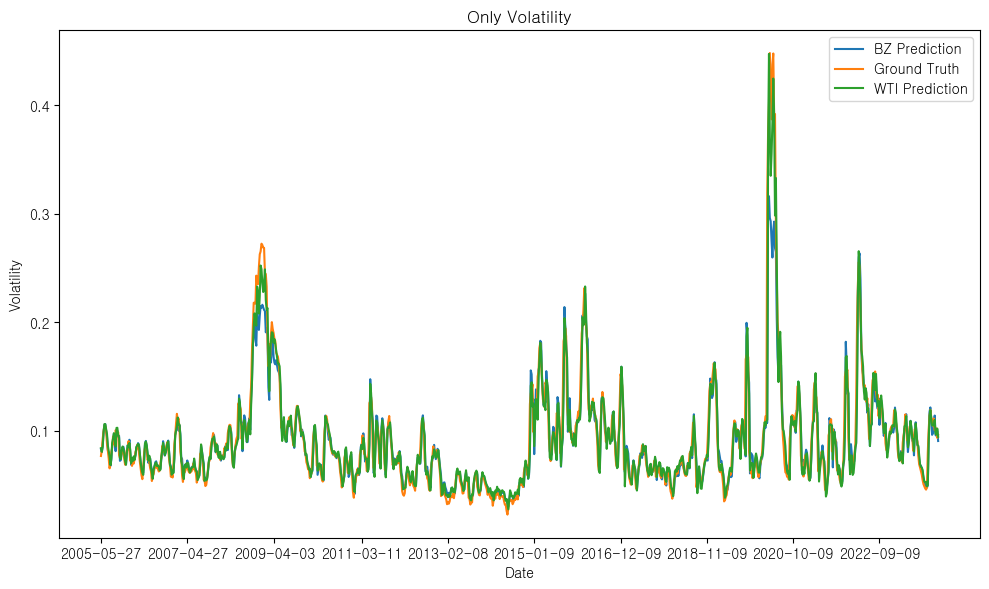

In [107]:
plt.figure(figsize=(10, 6))

plt.plot(pred_inv, label='BZ Prediction')
plt.plot(truth_inv, label='Ground Truth')
plt.plot(pred_inv2, label='WTI Prediction')

plt.title('Only Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv.index[0:-2:100])
plt.tight_layout()
plt.show()

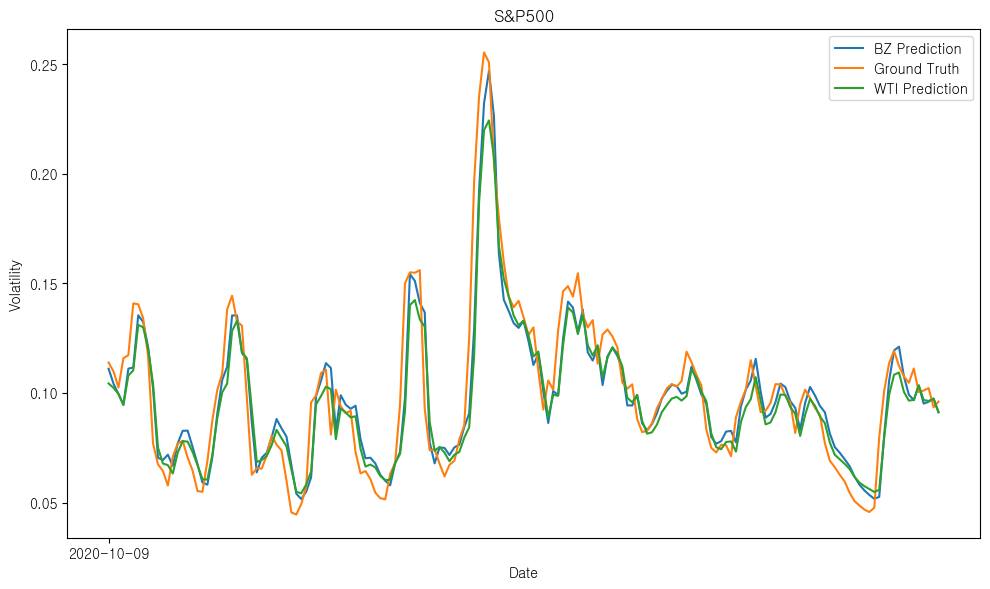

In [108]:
plt.figure(figsize=(10, 6))

start = 800
plt.plot(pred_inv3.iloc[start:, 0], label='BZ Prediction')
plt.plot(truth_inv4.iloc[start:, 0], label='Ground Truth')
plt.plot(pred_inv4.iloc[start:, 0], label='WTI Prediction')

plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv4.index[start:-1:200])
plt.tight_layout()
plt.show()

# 전체기간

In [109]:
print('BZBZ_onlyvol_Total')
print(calculate_mae(truth_inv.values, pred_inv.values))
print(calculate_rmse(truth_inv.values, pred_inv.values))
print(f'{r2_score(truth_inv.values, pred_inv.values):.4f}')

BZBZ_onlyvol_Total
0.00956092761791849
0.01893068269375258
0.8690


In [110]:
print('SPBZ_onlyvol_Total')
print(calculate_mae(truth_inv2.values, pred_inv2.values))
print(calculate_rmse(truth_inv2.values, pred_inv2.values))
print(f'{r2_score(truth_inv2.values, pred_inv2.values):.4f}')

SPBZ_onlyvol_Total
0.008315879510635971
0.014350097245253025
0.9247


In [111]:
print('BZBZ_SP500_Total')
print(calculate_mae(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values))
print(calculate_rmse(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values))
print(f'{r2_score(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values):.4f}')

BZBZ_SP500_Total
0.009363348378013232
0.016009587013284473
0.9063


In [112]:
print('SPBZ_SP500_Total')
print(calculate_mae(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values))
print(calculate_rmse(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values))
print(f'{r2_score(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values):.4f}')

SPBZ_SP500_Total
0.00902794406747913
0.015026565660573123
0.9175


# 평상시 기간

In [113]:
print('BZBZ_onlyvol_변동성 작은 부분')
print(calculate_mae(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv.loc[:'2008-09-01', 'Predictions'].values))

BZBZ_onlyvol_변동성 작은 부분
0.005105440096106369
0.00680960886050675


In [114]:
print('SPBZ_onlyvol_변동성 작은 부분')
print(calculate_mae(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv2.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv2.loc[:'2008-09-01', 'Predictions'].values))

SPBZ_onlyvol_변동성 작은 부분
0.004964782242106012
0.006432356124540334


In [115]:
print('BZBZ_SP500_변동성 작은 부분')
print(calculate_mae(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv3.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv3.loc[:'2008-09-01', 'Predictions'].values))

BZBZ_SP500_변동성 작은 부분
0.005506228036885495
0.007094637069307322


In [116]:
print('SPBZ_SP500_변동성 작은 부분')
print(calculate_mae(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv4.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv4.loc[:'2008-09-01', 'Predictions'].values))

SPBZ_SP500_변동성 작은 부분
0.005123663284088549
0.006879350732551993


# 금융위기기간

In [117]:
start_period = '2008-06-01'
end_period = '2009-12-01'

In [118]:
print('BZBZ_onlyvol_변동성 큰 부분')
print(calculate_mae(truth_inv.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv.loc[start_period:end_period, 'Predictions'].values))

BZBZ_onlyvol_변동성 큰 부분
0.017187979045636213
0.024772802073183813


In [119]:
print('SPBZ_onlyvol_변동성 큰 부분')
print(calculate_mae(truth_inv2.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv2.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv2.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv2.loc[start_period:end_period, 'Predictions'].values))

SPBZ_onlyvol_변동성 큰 부분
0.011522535821668853
0.016653591135829034


In [120]:
print('BZBZ_SP500_변동성 큰 부분')
print(calculate_mae(truth_inv3.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv3.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv3.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv3.loc[start_period:end_period, 'Predictions'].values))

BZBZ_SP500_변동성 큰 부분
0.013718935441379114
0.0188685565564339


In [121]:
print('SPBZ_SP500_변동성 큰 부분')
print(calculate_mae(truth_inv4.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv4.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv4.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv4.loc[start_period:end_period, 'Predictions'].values))

SPBZ_SP500_변동성 큰 부분
0.00981367509945669
0.013785618891506115
